In [1]:
%pip install fonttools seaborn matplotlib pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import glob
from fontTools.ttLib import TTFont, TTCollection


In [3]:
def count_glyphs(font_path):
    glyph_set = set()
    try:
        if font_path.lower().endswith(".ttc"):
            ttc = TTCollection(font_path)
            for font in ttc.fonts:
                for table in font["cmap"].tables:
                    glyph_set.update(table.cmap.keys())
        else:
            font = TTFont(font_path)
            for table in font["cmap"].tables:
                glyph_set.update(table.cmap.keys())
    except Exception as e:
        print(f"Error processing {font_path}: {e}")
    return len(glyph_set)


In [4]:
def get_fonts_from_directory(directory):
    font_paths = []
    for extension in ["*.ttf", "*.otf", "*.ttc"]:
        font_paths.extend(glob.glob(os.path.join(directory, extension)))
    return font_paths


In [5]:
def get_system_and_user_fonts():
    system_fonts_dir = os.path.join(os.environ["WINDIR"], "Fonts")
    user_fonts_dir = os.path.expanduser("~\\AppData\\Local\\Microsoft\\Windows\\Fonts")

    system_fonts = get_fonts_from_directory(system_fonts_dir)
    user_fonts = get_fonts_from_directory(user_fonts_dir)

    return system_fonts, user_fonts


In [11]:
system_fonts, user_fonts = get_system_and_user_fonts()
all_fonts = system_fonts + user_fonts

font_glyph_counts = []

for font_path in all_fonts:
    glyph_count = count_glyphs(font_path)
    font_glyph_counts.append((os.path.basename(font_path), glyph_count))


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


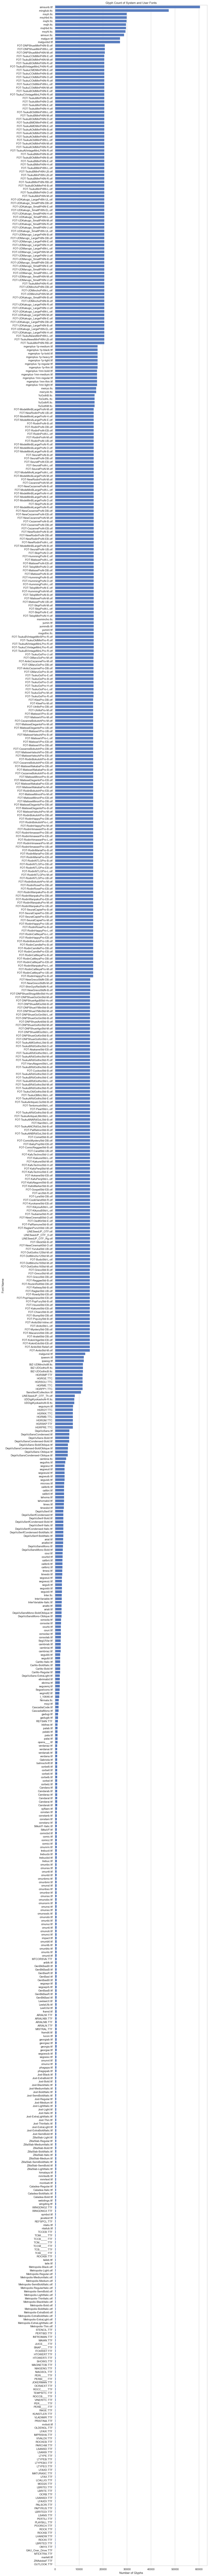

In [15]:
df = pd.DataFrame(font_glyph_counts, columns=["FontName", "GlyphCount"])

num_fonts = len(df)
height_per_font = 0.2
plot_height = num_fonts * height_per_font

sns.set_theme(style="whitegrid", palette="muted")

plt.figure(figsize=(12, plot_height))
sns.barplot(
    data=df.sort_values(by="GlyphCount", ascending=False),
    x="GlyphCount",
    y="FontName",
)
plt.title("Glyph Count of System and User Fonts")
plt.xlabel("Number of Glyphs")
plt.ylabel("Font Name")
plt.tight_layout()
plt.show()
